In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from numpy import random as random
import seaborn as sns

sns.set()

In [2]:
def sghmc( U, gradU, x0, C, V, n_samples=1000, n_steps=50, epsilon=0.1):
    
    B = 0.5 * V * epsilon
    C, V = np.asarray(C), np.asarray(V)
    n_params = x0.shape[0]
    D = np.sqrt(2*(C-B)*epsilon) if n_params ==1 else la.cholesky(2*(C-B)*epsilon) 
    
    samples = np.zeros((n_samples, n_params))
    samples[0] = x0
    
    for i in range(n_samples-1):
        x = samples[i]
        p = np.random.randn(n_params)
        
        for j in range(n_steps):
            x = x + epsilon * p
            p = p - epsilon * gradU(x) - epsilon * np.dot(C,p) - np.dot(D,random.randn(n_params))
        
        samples[i+1] = x
    
    return samples

In [3]:
# data
S = np.array([[1, 0.9], [0.9, 1]])
invS = la.inv(S)
U = lambda x: 0.5 * x.T @ invS @ x
gradUPerfect = lambda x: invS @ x
gradU = lambda x: invS @ x + np.random.randn(2)


samples = sghmc(U, gradU, x0=np.array([0,0]), C=1*np.eye(2), V=np.eye(2), n_samples=50, n_steps=50)

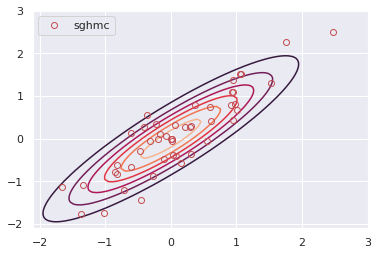

In [4]:
probmap = lambda x,y: np.exp(-0.5 * (invS[0,0]*x**2 + 2*invS[0,1]*x*y + invS[1,1]*y**2))

xs = np.linspace(-3, 3, 100)
xaxis, yaxis = np.meshgrid(xs, xs)

plt.contour(xaxis, yaxis, probmap(xaxis,yaxis))
plt.plot(samples[:,0], samples[:,1], 'ro', markerfacecolor='none', label='sghmc')
plt.xlim(-2.1, 3)
plt.ylim(-2.1, 3)
plt.legend()
plt.show()